In [213]:
#Reference: https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates



In [197]:
#Read JSON file as a panda's dataframe
jsonFile = "DiscordSentTweets.json"
data = pd.read_json(jsonFile)

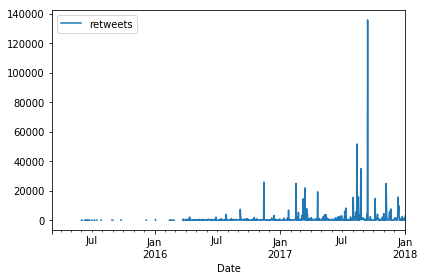

In [198]:
#Graph just retweets and timestamps
df = pd.DataFrame(data, columns = ['retweets', 'timestamp'])
df

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df
#df['2017']
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DiscordReTweetsAllTweets.png')

#Not sure how to show Time at (0,0)

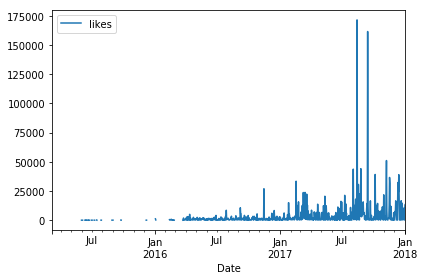

In [61]:
#Graph just likes and timestamps
df = pd.DataFrame(data, columns = ['likes', 'timestamp'])
df

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df
#df['2017']
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DiscordLikesAllTweets.png')

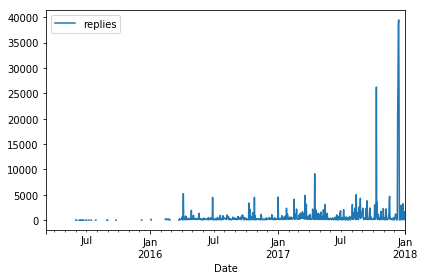

In [60]:
#Graph just replies and timestamps
df = pd.DataFrame(data, columns = ['replies', 'timestamp'])
df

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df
#df['2017']
df.groupby(level=0).count()
df.resample('D').sum()
retweets = df.resample('D').sum().plot()
plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig('DiscordRepliesAllTweets.png')

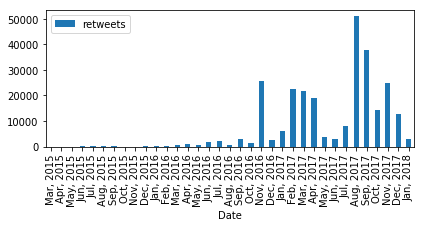

In [236]:
#Graph most engaging tweets' retweets and timestamps
df = pd.DataFrame(data, columns = ['retweets', 'timestamp'])

#pd.Timestamp(datetime(2012, 5, 1))
df['Date'] = pd.to_datetime(df['timestamp'])
df.index = df['Date']
del df['Date']
del df['timestamp']
#df

#Find Max + Reset Index (so that I can reassign column names)
gb = df.groupby([(df.index.year),(df.index.month)]).max().reset_index()
gb.columns = ["Year", "Month", "retweets"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "retweets"])

ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MostReTweetsPerMonthDiscord.png')

In [ ]:
T